In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
!ls

05a_Matplotlib_Notebook.ipynb
05b_Exploring Indicator's Across Countries.ipynb
05c_Folium_Notebook.ipynb
Practice.ipynb
world-development-indicators


In [3]:
!ls ./world-development-indicators/

Country.csv
CountryNotes.csv
Footnotes.csv
Indicators.csv
Series.csv
SeriesNotes.csv
database.sqlite
hashes.txt


In [4]:
!cat ./world-development-indicators/Indicators.csv |wc -l

5656459


In [3]:
data = pd.read_csv('./world-development-indicators/Indicators.csv', sep = ',')

In [4]:
data.shape

(5656458, 6)

In [5]:
data.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [6]:
year = data.Year.unique().tolist()
len(year)

56

In [26]:
countries = data.CountryName.unique().tolist()
len(countries)

247

In [7]:
countryCode = data.CountryCode.unique().tolist()
len(countryCode)

247

In [8]:
print(min(year), 'to', max(year))

1960 to 2015


# Matplot

In [30]:
hist_indicator ='CO2 emissions \(metric'
hist_country = 'China'

filter1 = data['IndicatorName'].str.contains(hist_indicator)
# filter2 = data['CountryName'].str.contains(hist_country)
filter3 = (data.CountryName =='China')

stage = data[filter1 & filter3]

In [33]:
len(stage.Year)

52

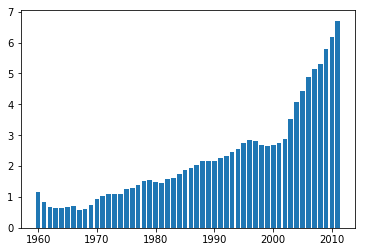

In [40]:
plt.bar(stage['Year'].values, stage['Value'])
plt.show()

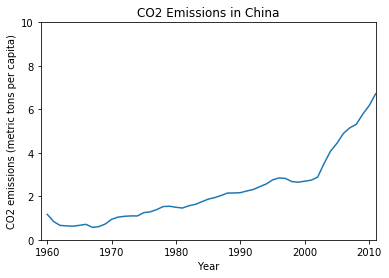

In [46]:
plt.plot(stage['Year'], stage['Value'])
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title('CO2 Emissions in China')
plt.axis([1959, 2011, 0, 10])
plt.show()

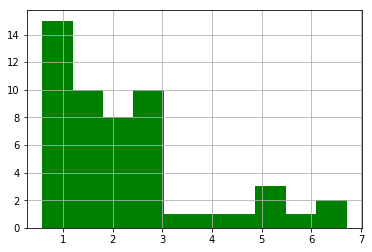

In [50]:
plt.hist(stage['Value'], 10, facecolor = 'green')
plt.grid(True)
plt.show()

In [54]:
hist_year = 2011
hist_indicator = 'CO2 emissions \(metric'
filter1 = data['IndicatorName'].str.contains(hist_indicator)
filter2 = data['Year']==hist_year

In [55]:
co2_2011 = data[filter1&filter2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [62]:
co2_2011[co2_2011['CountryCode'] == 'CHN']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5076941,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.710302


<function matplotlib.pyplot.show(*args, **kw)>

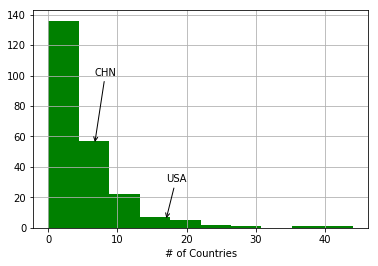

In [67]:
fig, ax = plt.subplots()

ax.annotate('USA',
           xy = (17, 5), xycoords = 'data',
           xytext = (17, 30), textcoords = 'data',
           arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))

ax.annotate('CHN',
           xy = (6.7, 55), xycoords = 'data',
           xytext = (6.7, 100), textcoords = 'data',
           arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))

plt.hist(co2_2011['Value'], 10, facecolor = 'green')
plt.xlabel('# of Countries')
# plt.grid(True)
plt.show

In [71]:
flag_high = co2_2011['Value'] >20
co2_2011[flag_high].CountryName.tolist()

['Aruba',
 'Brunei Darussalam',
 'Kuwait',
 'Luxembourg',
 'Oman',
 'Qatar',
 'Trinidad and Tobago',
 'United Arab Emirates']

# Part 2

In [12]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

filter1 = data['IndicatorName'].str.contains(hist_indicator)
filter2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[filter1 & filter2]

In [13]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [16]:
hist_indicator ='CO2 emissions \(metric'

filter1 = data['IndicatorName'].str.contains(hist_indicator)
filter2 = data['CountryCode'].str.contains(hist_country)

stage = data[filter1 & filter2]
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


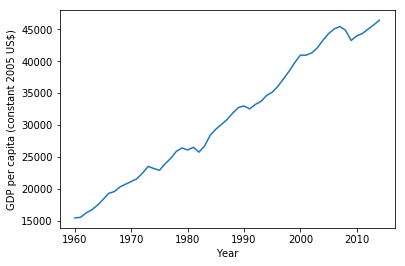

In [18]:
plt.plot(gdp_stage['Year'], gdp_stage['Value'])
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.show()

In [19]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stage_trunc))

52


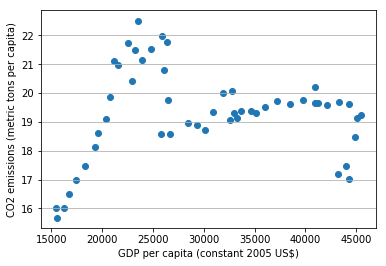

In [21]:
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)
axis.scatter(gdp_stage_trunc['Value'], stage['Value'])

In [22]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [23]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [24]:
yearsFilter = [2010, 2011, 2012, 2013, 2014]
countryFilter = random.sample(countries, 2)

In [47]:
countryFilter =['Moldova', 'Cabo Verde']

In [48]:
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter =['Interest payments on external debt, public and publicly guaranteed (PPG) (INT, current US$)']

In [49]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))

In [50]:
country1_data = data.loc[filterMesh]

In [51]:
type(country1_data)

pandas.core.frame.DataFrame

In [52]:
len(country1_data)

5

In [53]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

In [54]:
len(country2_data)

5

In [55]:
filteredData1 = []
filteredData2 = []

In [56]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years.
# brings up the discussion of missing data/ missing fields
# until we find full data

while(len(filteredData1) < len(yearsFilter)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))

Skipping ... ['Completeness of birth registration, rural (%)'] since very few rows (0) found
Skipping ... ['PPG, multilateral concessional (AMT, current US$)'] since very few rows (0) found
Skipping ... ['Binding coverage, primary products (%)'] since very few rows (3) found
Skipping ... ['Debt forgiveness grants (current US$)'] since very few rows (0) found
Skipping ... ['Children in employment, male (% of male children ages 7-14)'] since very few rows (1) found


In [57]:
indicatorsFilter

['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']

In [58]:
len(filteredData1)

5

In [59]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [60]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [61]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [62]:
filteredData1

,CountryName,IndicatorName,Year,Value
4983129,Qatar,"Labor force participation rate, total (% of to...",2010,86.400002
5161760,Qatar,"Labor force participation rate, total (% of to...",2011,86.599998
5337384,Qatar,"Labor force participation rate, total (% of to...",2012,86.699997
5497962,Qatar,"Labor force participation rate, total (% of to...",2013,86.699997
5616725,Qatar,"Labor force participation rate, total (% of to...",2014,86.599998


In [63]:
filteredData2

,CountryName,IndicatorName,Year,Value
4905802,Dominican Republic,"Labor force participation rate, total (% of to...",2010,64.900002
5088673,Dominican Republic,"Labor force participation rate, total (% of to...",2011,64.900002
5264467,Dominican Republic,"Labor force participation rate, total (% of to...",2012,64.900002
5433261,Dominican Republic,"Labor force participation rate, total (% of to...",2013,64.900002
5571604,Dominican Republic,"Labor force participation rate, total (% of to...",2014,64.900002


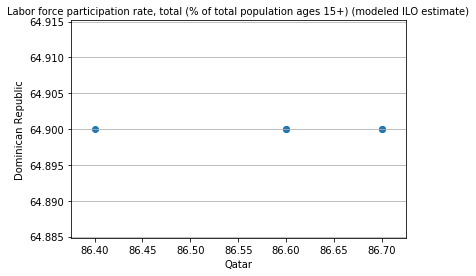

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

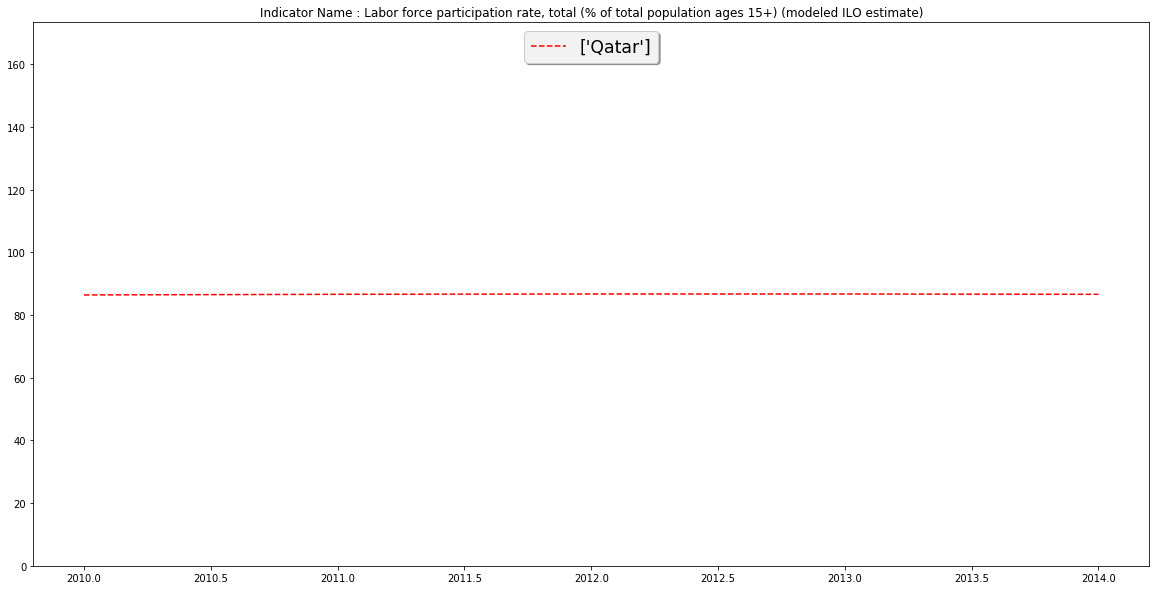

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

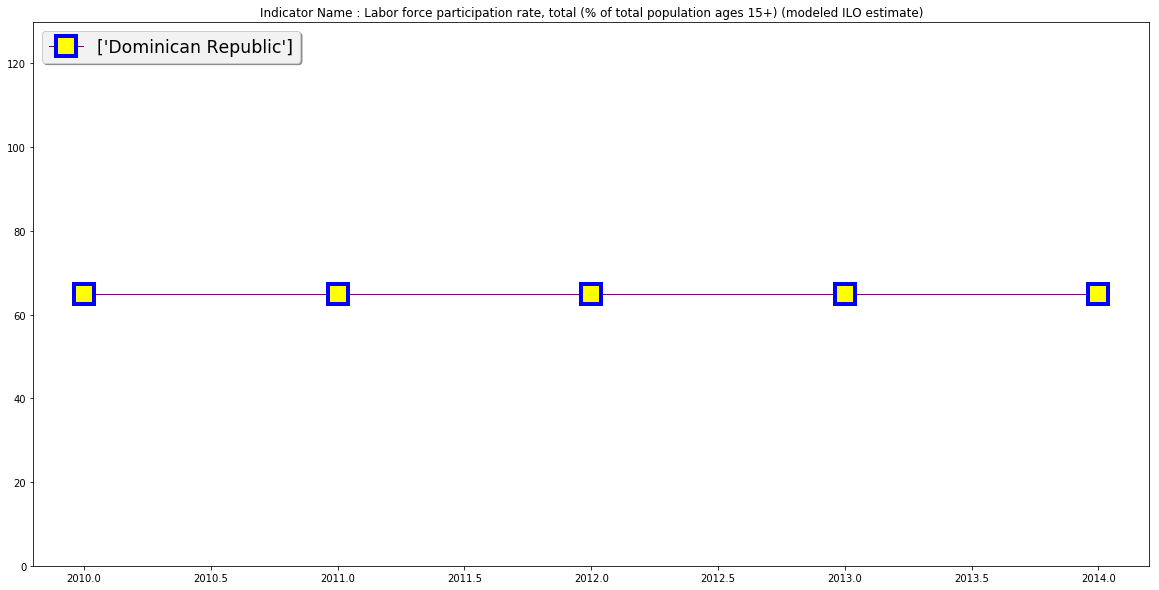

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

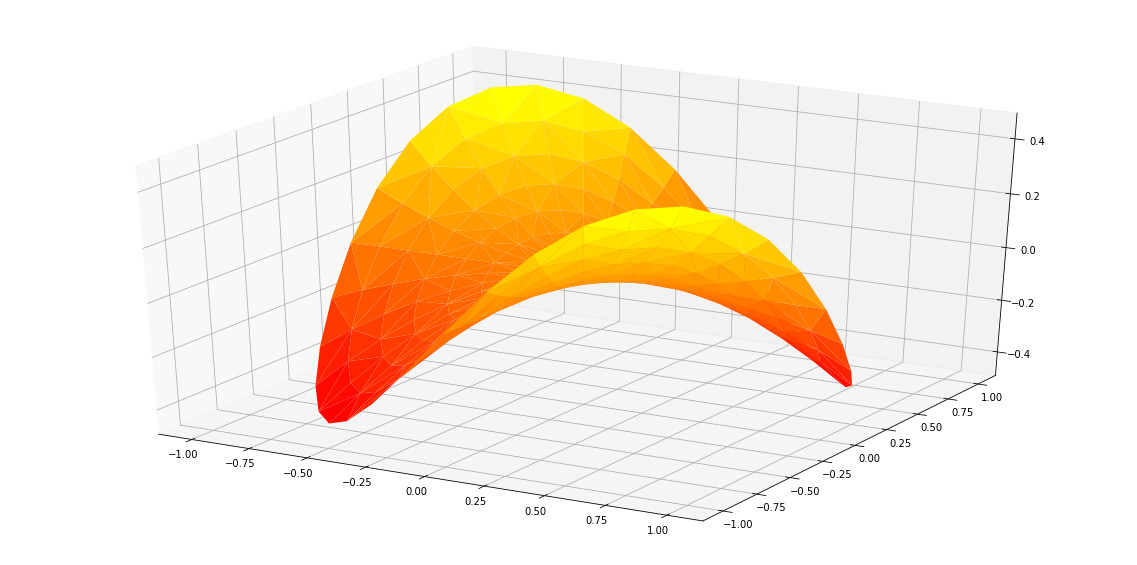

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()

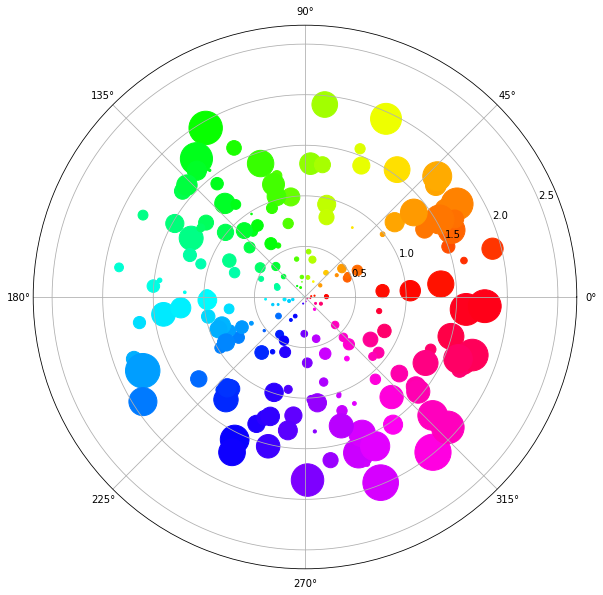

In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")

# Folium